<a href="https://colab.research.google.com/github/AbhinanduReddy/hand-predictor-for-driving-/blob/master/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tqdm import tqdm
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/drive/My Drive/labelso.csv')

In [ ]:
df.head()

,frame_no,x_position_right_hand,y_position_right_hand,x_position_left_hand,y_position_left_hand
0,2,115,318,269,316
1,3,112,292,275,295
2,4,114,273,276,279
3,5,110,261,280,260
4,6,108,258,282,249


In [ ]:

a=np.array(df['y_position_right_hand']-df['y_position_left_hand'])
b=np.array(df['x_position_right_hand']-df['x_position_left_hand'])
slope=np.tan(a/b)
slope.shape

(701,)

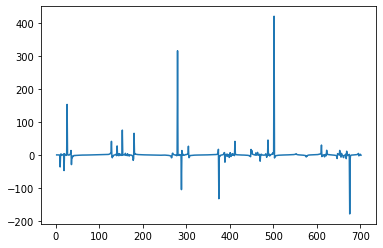

In [ ]:
plt.plot(df['frame_no'],slope)

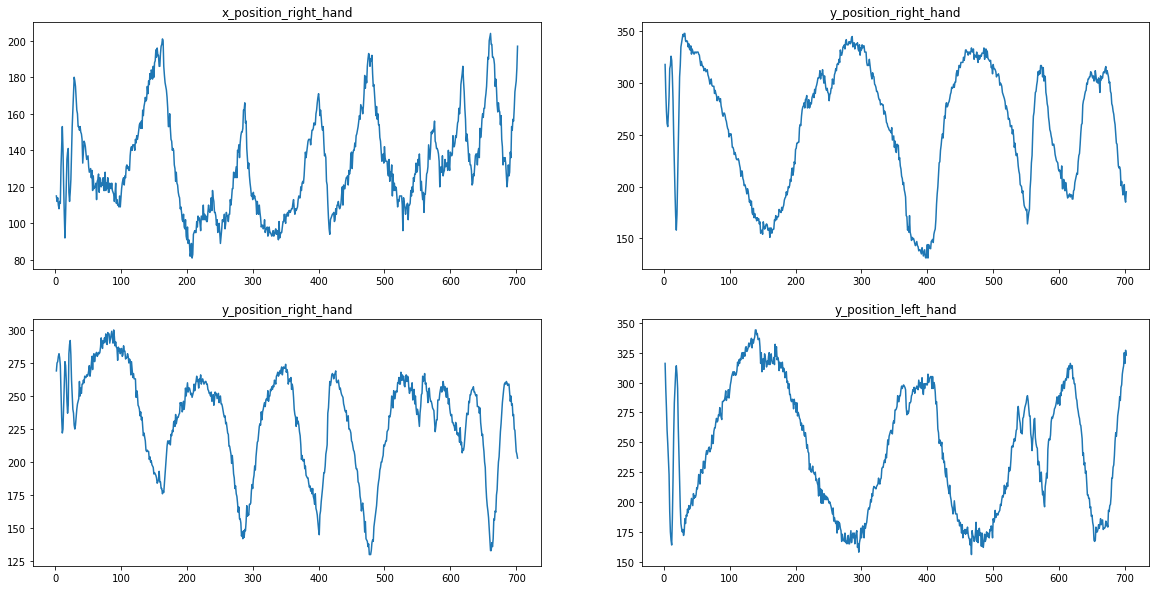

In [ ]:
fig,ax=plt.subplots(2,2)

ax[0][0].plot(df['frame_no'],df['x_position_right_hand'] )
ax[0][0].set_title('x_position_right_hand')
ax[0][1].plot(df['frame_no'],df['y_position_right_hand'])
ax[0][1].set_title('y_position_right_hand')
ax[1][0].plot(df['frame_no'],df['x_position_left_hand'])
ax[1][0].set_title('y_position_right_hand')
ax[1][1].plot(df['frame_no'],df['y_position_left_hand'])
ax[1][1].set_title('y_position_left_hand')

fig.set_figheight(10)
fig.set_figwidth(20)

In [ ]:
data_path='/content/drive/My Drive/image_dataset';
#/content/sample_data/image_dataset/0.png

In [ ]:
image=[]
y_xpr=[]
y_ypr=[]
y_xpl=[]
y_ypl=[]
def load_data_train():
    for index,rows in tqdm(df.iterrows()):
        i=rows['frame_no']
        i=str(i)+'.png'
        img_path=os.path.join(data_path,i)
        img=cv2.imread(img_path)
        image.append(img)
        y_xpr.append(rows['x_position_right_hand'])
        y_ypr.append(rows['y_position_right_hand'])
        y_xpl.append(rows['x_position_left_hand'])
        y_ypl.append(rows['y_position_left_hand'])
        

In [ ]:
load_data_train()

701it [00:05, 130.83it/s]


In [ ]:
x=np.array(image)
x=x/255
x.shape

(701, 360, 380, 3)

In [ ]:
y_xpr=np.array(y_xpr)/380
y_ypr=np.array(y_ypr)/380
y_xpl=np.array(y_xpl)/380
y_ypl=np.array(y_ypl)/380

In [ ]:
print(y_xpr.shape,
y_ypr.shape,
y_xpl.shape,
y_ypl.shape)

(701,) (701,) (701,) (701,)


In [ ]:
imagetest=[]
y_xprtest=[]
y_yprtest=[]
y_xpltest=[]
y_ypltest=[]
def load_data_test():
    for index,rows in tqdm(df_test.iterrows()):
        i=rows['frame_no']
        i=str(i)+'.png'
        img_path=os.path.join(data_path,i)
        img=cv2.imread(img_path)
        imagetest.append(img)
        y_xprtest.append(rows['x_position_right_hand'])
        y_yprtest.append(rows['y_position_right_hand'])
        y_xpltest.append(rows['x_position_left_hand'])
        y_ypltest.append(rows['y_position_left_hand'])
        

In [ ]:
df_test=pd.read_csv('/content/drive/My Drive/testlabels.csv')

In [ ]:
load_data_test()

58it [00:00, 128.60it/s]


In [ ]:
xtest=np.array(imagetest)
xtest=xtest/255
xtest.shape

(58, 360, 380, 3)

In [ ]:
y_xprtest=np.array(y_xprtest)/380
y_yprtest=np.array(y_yprtest)/380
y_xpltest=np.array(y_xpltest)/380
y_ypltest=np.array(y_ypltest)/380

In [ ]:
print(y_xprtest.shape,
y_yprtest.shape,
y_xpltest.shape,
y_ypltest.shape)

(58,) (58,) (58,) (58,)


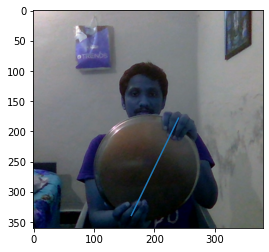

In [ ]:

plt.figure()

plt.imshow(x[25]) 
plt.plot([y_xpr[25]*380,y_xpl[25]*380],[y_ypr[25]*380,y_ypl[25]*380])
plt.show()  # display it

In [ ]:
x[0].shape

(360, 380, 3)

In [ ]:
def model_architecture(input_shape):
    input_layer=keras.layers.Input(shape=input_shape)
    model=keras.layers.Conv2D(64,(3*3),activation='relu')(input_layer)
    model=keras.layers.Conv2D(64,(3*3),activation='relu')(model)
    
    model=keras.layers.MaxPool2D()(model)
    model=keras.layers.Conv2D(128,(3*3),activation='relu')(model)
    
    model=keras.layers.Conv2D(128,(3*3),activation='relu')(model)
    model=keras.layers.MaxPool2D()(model)
    model=keras.layers.Conv2D(256,(3*3),activation='relu')(model)
    model=keras.layers.Conv2D(256,(3*3),activation='relu')(model)
   
    model=keras.layers.Conv2D(256,(3*3),activation='relu')(model)
    model=keras.layers.Conv2D(256,(3*3),activation='relu')(model)
    model=keras.layers.MaxPool2D()(model)
    model=keras.layers.Conv2D(512,(3*3),activation='relu')(model)
    
    model=keras.layers.Conv2D(512,(3*3),activation='relu')(model)
    model=keras.layers.MaxPool2D()(model)
    bottelneck =keras.layers.GlobalMaxPool2D()(model)
    
    right_x=keras.layers.Dense(units=128,activation='relu')(bottelneck)
    right_x=keras.layers.Dense(units=64,activation='relu')(right_x)
    right_x=keras.layers.Dense(units=1,activation='linear',name='right_x')(right_x)
    
    right_y=keras.layers.Dense(units=128,activation='relu')(bottelneck)
    right_y=keras.layers.Dense(units=64,activation='relu')(right_y)
    right_y=keras.layers.Dense(units=1,activation='linear',name='right_y')(right_y)
    
    left_x=keras.layers.Dense(units=128,activation='relu')(bottelneck)
    left_x=keras.layers.Dense(units=64,activation='relu')(left_x)
    left_x=keras.layers.Dense(units=1,activation='linear',name='left_x')(left_x)
    
    left_y=keras.layers.Dense(units=128,activation='relu')(bottelneck)
    left_y=keras.layers.Dense(units=64,activation='relu')(left_y)
    left_y=keras.layers.Dense(units=1,activation='linear',name='left_y')(left_y)
    
    
    model=keras.models.Model(input_layer,[right_x,right_y,left_x,left_y])
    return model
    
    
   
    

In [ ]:
def model_architecture2(input_shape):

  input_layer2=keras.layers.Input(shape=input_shape)
  model2=keras.layers.Conv2D(64,(3*3),activation='relu')(input_layer2)
  model2=keras.layers.MaxPool2D()(model2)
  model2=keras.layers.Conv2D(128,(3*3),activation='relu')(model2)
  model2=keras.layers.MaxPool2D()(model2)
  model2=keras.layers.Conv2D(256,(3*3),activation='relu')(model2)
  model2=keras.layers.MaxPool2D()(model2)
  model2=keras.layers.Conv2D(512,(3*3),activation='relu')(model2)
  bottelneck2 =keras.layers.Flatten()(model2)

  right_x2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
  right_x2=keras.layers.Dense(units=1,activation='linear',name='right_x2')(right_x2)

  right_y2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
  right_y2=keras.layers.Dense(units=1,activation='linear',name='right_y2')(right_y2)

  left_x2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
  left_x2=keras.layers.Dense(units=1,activation='linear',name='left_x2')(left_x2)
    
  left_y2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
  left_y2=keras.layers.Dense(units=1,activation='linear',name='left_y2')(left_y2)
    
    
  model2=keras.models.Model(input_layer2,[right_x2,right_y2,left_x2,left_y2])
  return model2


In [ ]:
model2=model_architecture2((360,380,3))
model2.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 360, 380, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 352, 372, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 176, 186, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 168, 178, 128 663680      max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
n_epoch = 10
model2.compile(optimizer='adam', loss=['mse', 'mse','mse','mse'],  metrics = ['mae'])
history2=model2.fit(x,[y_xpr,y_ypr,y_xpl,y_ypl],validation_split=0.1, epochs=n_epoch,batch_size=20)

NameError: ignored

In [ ]:
model2.evaluate(xtest,[y_xprtest,y_yprtest,y_xpltest,y_ypltest])

2/2 [==============================] - 4s 2s/step - loss: 1.7278 - right_x2_loss: 0.2262 - right_y2_loss: 0.5440 - left_x2_loss: 0.3985 - left_y2_loss: 0.5590 - right_x2_mae: 0.4694 - right_y2_mae: 0.7251 - left_x2_mae: 0.6280 - left_y2_mae: 0.7336


[1.7277730703353882,
 0.22623881697654724,
 0.5440059304237366,
 0.3985355496406555,
 0.5589928030967712,
 0.46936801075935364,
 0.7251157164573669,
 0.6279988884925842,
 0.7335931062698364]

In [ ]:
model=model_architecture((360, 380, 3))


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 360, 380, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 352, 372, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 344, 364, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 172, 182, 64) 0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='loss', verbose=1,
    save_best_only=True, mode='auto', period=1)

In [ ]:
m = 256
n_epoch = 10
model.compile(optimizer='adam', loss=['mse', 'mse','mse','mse'],  metrics = ['mae'])
history=model.fit(x,[y_xpr,y_ypr,y_xpl,y_ypl],validation_split=0.1, epochs=n_epoch,batch_size=20)



Epoch 1/10
32/32 [==============================] - 166s 5s/step - loss: 0.1874 - right_x_loss: 0.0258 - right_y_loss: 0.0673 - left_x_loss: 0.0399 - left_y_loss: 0.0544 - right_x_mae: 0.1243 - right_y_mae: 0.2091 - left_x_mae: 0.1433 - left_y_mae: 0.1764 - val_loss: 0.0680 - val_right_x_loss: 0.0133 - val_right_y_loss: 0.0169 - val_left_x_loss: 0.0165 - val_left_y_loss: 0.0213 - val_right_x_mae: 0.0966 - val_right_y_mae: 0.1207 - val_left_x_mae: 0.0923 - val_left_y_mae: 0.1301
Epoch 2/10
32/32 [==============================] - 165s 5s/step - loss: 0.0622 - right_x_loss: 0.0049 - right_y_loss: 0.0276 - left_x_loss: 0.0107 - left_y_loss: 0.0191 - right_x_mae: 0.0569 - right_y_mae: 0.1449 - left_x_mae: 0.0829 - left_y_mae: 0.1214 - val_loss: 0.0490 - val_right_x_loss: 0.0089 - val_right_y_loss: 0.0110 - val_left_x_loss: 0.0130 - val_left_y_loss: 0.0161 - val_right_x_mae: 0.0745 - val_right_y_mae: 0.0890 - val_left_x_mae: 0.0871 - val_left_y_mae: 0.1117
Epoch 3/10
32/32 [================

In [ ]:
model.evaluate(xtest,[y_xprtest,y_yprtest,y_xpltest,y_ypltest])

2/2 [==============================] - 13s 7s/step - loss: 0.0578 - right_x_loss: 0.0127 - right_y_loss: 0.0186 - left_x_loss: 0.0050 - left_y_loss: 0.0215 - right_x_mae: 0.0901 - right_y_mae: 0.1262 - left_x_mae: 0.0581 - left_y_mae: 0.1321


[0.05775760859251022,
 0.01268557459115982,
 0.01855609193444252,
 0.005048184655606747,
 0.021467752754688263,
 0.09013731777667999,
 0.1262349784374237,
 0.058097001165151596,
 0.13207153975963593]

In [ ]:
from tensorflow.keras.applications.inception_v3 import vgg16
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

#inception_weight_file=r"F:\pretrained\inception_v3_weights_tf_dim_ordering_tf_kernels_notop_1.h5"

pre_trained_vgg16=VGG16(input_shape=(360,380,3),
                                  include_top=False,
                                  weights='imagenet')
#pre_trained_inception.load_weights(inception_weight_file)

for layers in pre_trained_inception.layers:
  layers.trainable=False
last_layer = pre_trained_vgg16.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print(last_output)
right_x2=keras.layers.Dense(units=64,activation='linear')(laast_output)
right_x2=keras.layers.Dense(units=1,activation='linear',name='right_x2')(right_x2)

right_y2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
right_y2=keras.layers.Dense(units=1,activation='linear',name='right_y2')(right_y2)

left_x2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
left_x2=keras.layers.Dense(units=1,activation='linear',name='left_x2')(left_x2)
    
left_y2=keras.layers.Dense(units=64,activation='linear')(bottelneck2)
left_y2=keras.layers.Dense(units=1,activation='linear',name='left_y2')(left_y2)
    
    
model2=keras.models.Model(input_layer2,[right_x2,right_y2,left_x2,left_y2])
return model2           

model = Model(pre_trained_inception.input, x) 

model.compile(optimizer = RMSprop(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])

history=model.fit(train_images,train_labels,epochs=1,validation_data=(test_images,test_labels))

In [ ]:
loss=history.history['loss']
right_x_loss=history.history['right_x_loss']
right_y_loss=history.history['right_y_loss']
left_x_loss=history.history['left_x_loss']
left_y_loss=history.history['left_y_loss']


e=range(len(loss))

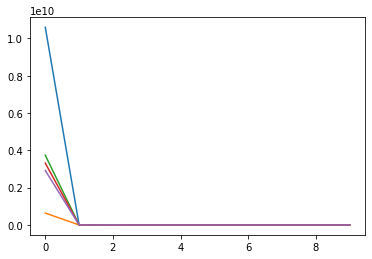

In [ ]:
plt.plot(e,loss,label='loss')
plt.plot(e,right_x_loss,label='right_x_loss')
plt.plot(e,right_y_loss,label='right_y_loss')
plt.plot(e,left_x_loss,label='left_x_loss')
plt.plot(e,left_y_loss,label='left_y_loss')

plt.show()

In [ ]:
model2.save('/content/drive/My Drive/drivefinal.h5')

In [ ]:
x[5].shape

(360, 380, 3)

130.3933608531952 232.6457929611206 252.44531154632568 250.57158708572388


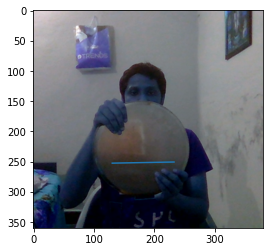

In [ ]:
num=550
test=[]
test.append(x[num])
test=np.array(test)
x1,y1,x2,y2=model.predict(test)
#-16.739153116941452 -17.363728880882263 -16.061230078339577 -18.627445623278618
print(x1[0][0]*380,x2[0][0]*380,y1[0][0]*380,y2[0][0]*380)

plt.figure()

plt.imshow(x[num]) 
plt.plot([x1[0][0]*380,x2[0][0]*380],[y1[0][0]*380,y2[0][0]*380])
plt.show()  # display it

In [ ]:
df.head(8)

,frame_no,x_position_right_hand,y_position_right_hand,x_position_left_hand,y_position_left_hand
0,2,115,318,269,316
1,3,112,292,275,295
2,4,114,273,276,279
3,5,110,261,280,260
4,6,108,258,282,249
5,7,112,271,279,235
6,8,111,287,273,223
7,9,131,314,252,192


In [ ]:
y_xpr

array([143, 106, 113, 117, 108, 112, 123, 121, 116, 123, 125, 152, 128,
       132, 131, 131, 134, 134, 135, 139, 142, 138, 146, 141, 140, 142,
       143, 145, 146, 150, 152, 149, 153, 128, 155, 155, 155, 159, 165,
       161, 168, 170, 172, 172, 103, 176, 177, 178, 180, 184, 181, 178,
       184, 186, 187,  94, 189, 193, 190, 191, 194, 195, 192, 188, 190,
       185, 107, 203, 194, 198, 201, 199, 187, 183, 177, 178, 174, 120,
       163, 156, 158, 149, 152, 145, 144, 143, 143, 144, 137, 136, 134,
       133, 126, 126, 120, 124, 116, 116, 109, 147, 107, 107, 113, 104,
       107, 101, 100, 100, 100,  99, 114, 139, 112,  97,  89,  96,  87,
        86,  83,  83,  84,  73, 121,  83,  94,  96, 102,  96,  98,  99,
       108, 104, 108, 116, 101, 105, 117, 103, 108, 111, 106, 109, 105,
       103, 108, 105, 105, 107, 109, 105, 110, 111, 111, 110, 116, 122,
       116, 116, 111, 112, 107, 104, 104, 106,  99, 102, 139,  94,  92,
        96,  97, 101, 107, 103, 102, 107, 107, 154, 110, 106, 10

In [ ]:
modell=keras.models.load_model('/content/drivefinal.h5')

In [ ]:
import cv2, os
import numpy as np
import matplotlib.image as mpimg


IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)


def load_image(data_dir, image_file):
    """
    Load RGB images from a file
    """
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))


def crop(image):
    """
    Crop the image (removing the sky at the top and the car front at the bottom)
    """
    return image[60:-25, :, :] # remove the sky and the car front


def resize(image):
    """
    Resize the image to the input shape used by the network model
    """
    return cv2.resize(image, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)


def rgb2yuv(image):
    """
    Convert the image from RGB to YUV (This is what the NVIDIA model does)
    """
    return cv2.cvtColor(image, cv2.COLOR_RGB2YUV)


def preprocess(image):
    """
    Combine all preprocess functions into one
    """
    image = crop(image)
    image = resize(image)
    image = rgb2yuv(image)
    return image


def choose_image(data_dir, center, left, right, steering_angle):
    """
    Randomly choose an image from the center, left or right, and adjust
    the steering angle.
    """
    choice = np.random.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle + 0.2
    elif choice == 1:
        return load_image(data_dir, right), steering_angle - 0.2
    return load_image(data_dir, center), steering_angle


def random_flip(image, steering_angle):
    """
    Randomly flipt the image left <-> right, and adjust the steering angle.
    """
    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
    return image, steering_angle


def random_translate(image, steering_angle, range_x, range_y):
    """
    Randomly shift the image virtially and horizontally (translation).
    """
    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle


def random_shadow(image):
    """
    Generates and adds random shadow
    """
    # (x1, y1) and (x2, y2) forms a line
    # xm, ym gives all the locations of the image
    x1, y1 = IMAGE_WIDTH * np.random.rand(), 0
    x2, y2 = IMAGE_WIDTH * np.random.rand(), IMAGE_HEIGHT
    xm, ym = np.mgrid[0:IMAGE_HEIGHT, 0:IMAGE_WIDTH]

    # mathematically speaking, we want to set 1 below the line and zero otherwise
    # Our coordinate is up side down.  So, the above the line: 
    # (ym-y1)/(xm-x1) > (y2-y1)/(x2-x1)
    # as x2 == x1 causes zero-division problem, we'll write it in the below form:
    # (ym-y1)*(x2-x1) - (y2-y1)*(xm-x1) > 0
    mask = np.zeros_like(image[:, :, 1])
    mask[(ym - y1) * (x2 - x1) - (y2 - y1) * (xm - x1) > 0] = 1

    # choose which side should have shadow and adjust saturation
    cond = mask == np.random.randint(2)
    s_ratio = np.random.uniform(low=0.2, high=0.5)

    # adjust Saturation in HLS(Hue, Light, Saturation)
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    hls[:, :, 1][cond] = hls[:, :, 1][cond] * s_ratio
    return cv2.cvtColor(hls, cv2.COLOR_HLS2RGB)


def random_brightness(image):
    """
    Randomly adjust brightness of the image.
    """
    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + 0.4 * (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):
    """
    Generate an augumented image and adjust steering angle.
    (The steering angle is associated with the center image)
    """
    image, steering_angle = choose_image(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_translate(image, steering_angle, range_x, range_y)
    image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle


def batch_generator(data_dir, image_paths, steering_angles, batch_size, is_training):
    """
    Generate training image give image paths and associated steering angles
    """
    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            # argumentation
            if is_training and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            # add the image and steering angle to the batch
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        yield images, steers



In [ ]:
#parsing command line arguments
import argparse
#decoding camera images
import base64
#for frametimestamp saving
from datetime import datetime
#reading and writing files
import os
#high level file operations
import shutil
#matrix math
import numpy as np
#real-time server
import socketio
#concurrent networking 
import eventlet
#web server gateway interface
import eventlet.wsgi
#image manipulation
from PIL import Image
#web framework
from flask import Flask
#input output
from io import BytesIO

#load our saved model
from keras.models import load_model

#helper class
import utils

#initialize our server
sio = socketio.Server()
#our flask (web) app
app = Flask(__name__)
#init our model and image array as empty
model = None
prev_image_array = None

#set min/max speed for our autonomous car
MAX_SPEED = 25
MIN_SPEED = 10

#and a speed limit
speed_limit = MAX_SPEED

#registering event handler for the server
@sio.on('telemetry')
def telemetry(sid, data):
    if data:
        # The current steering angle of the car
        steering_angle = float(data["steering_angle"])
        # The current throttle of the car, how hard to push peddle
        throttle = float(data["throttle"])
        # The current speed of the car
        speed = float(data["speed"])
        # The current image from the center camera of the car
        image = Image.open(BytesIO(base64.b64decode(data["image"])))
        try:
            image = np.asarray(image)       # from PIL image to numpy array
            image = utils.preprocess(image) # apply the preprocessing
            image = np.array([image])       # the model expects 4D array

            # predict the steering angle for the image
            #steering_angle = float(model.predict(image, batch_size=1))
            steering_angle=float(0.5)
            # lower the throttle as the speed increases
            # if the speed is above the current speed limit, we are on a downhill.
            # make sure we slow down first and then go back to the original max speed.
            global speed_limit
            if speed > speed_limit:
                speed_limit = MIN_SPEED  # slow down
            else:
                speed_limit = MAX_SPEED
            throttle = 1.0 - steering_angle**2 - (speed/speed_limit)**2

            print('{} {} {}'.format(steering_angle, throttle, speed))
            send_control(steering_angle, throttle)
        except Exception as e:
            print(e)

        # save frame
        if args.image_folder != '':
            timestamp = datetime.utcnow().strftime('%Y_%m_%d_%H_%M_%S_%f')[:-3]
            image_filename = os.path.join(args.image_folder, timestamp)
            image.save('{}.jpg'.format(image_filename))
    else:
        
        sio.emit('manual', data={}, skip_sid=True)


@sio.on('connect')
def connect(sid, environ):
    print("connect ", sid)
    send_control(0, 0)


def send_control(steering_angle, throttle):
    sio.emit(
        "steer",
        data={
            'steering_angle': steering_angle.__str__(),
            'throttle': throttle.__str__()
        },
        skip_sid=True)


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='Remote Driving')
    parser.add_argument(
        'model',
        type=str,
        help='Path to model h5 file. Model should be on the same path.'
    )
    parser.add_argument(
        'image_folder',
        type=str,
        nargs='?',
        default='',
        help='Path to image folder. This is where the images from the run will be saved.'
    )
    args = parser.parse_args()

    #load model
    #model = load_model(args.model)

    if args.image_folder != '':
        print("Creating image folder at {}".format(args.image_folder))
        if not os.path.exists(args.image_folder):
            os.makedirs(args.image_folder)
        else:
            shutil.rmtree(args.image_folder)
            os.makedirs(args.image_folder)
        print("RECORDING THIS RUN ...")
    else:
        print("NOT RECORDING THIS RUN ...")

    # wrap Flask application with engineio's middleware
    app = socketio.Middleware(sio, app)

    # deploy as an eventlet WSGI server
    eventlet.wsgi.server(eventlet.listen(('', 4567)), app)


ModuleNotFoundError: ignored